In [ ]:

# Importando bibliotecas base
import pandas as pd
import numpy as np

# Importando Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para Estatistica
import scipy.stats as stat


In [ ]:
df = pd.read_json('enem_2023_ficticio.json')
df.head()

Linguagens              float64
Ciências humanas        float64
Ciências da natureza    float64
Matemática              float64
Redação                 float64
Sexo                     object
dtype: object


In [ ]:
df.fillna(0, inplace=True)
pd.options.display.float_format = '{:.2f}'.format
df

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.67,686.51,390.48,452.28,546.37,Homem
1,359.38,642.08,0.00,412.21,741.83,Mulher
2,622.73,495.51,443.18,669.68,684.52,Homem
3,350.16,602.04,413.98,676.61,671.24,Homem
4,384.09,489.25,609.76,520.43,744.38,Homem
...,...,...,...,...,...,...
995,455.48,557.76,511.35,510.36,0.00,Homem
996,457.76,444.62,542.03,419.69,715.98,Mulher
997,551.17,568.77,508.03,0.00,798.41,Homem
998,495.80,522.13,414.17,451.70,593.39,Homem


**Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).**

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.


**1. Qual das disciplinas tem a maior amplitude de nota?**

In [ ]:
def describe_new(df):
  df1 = df.describe()
  df.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
  return df1



In [ ]:
describe_new(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,461.53,493.31,411.44,495.23,548.49
std,175.54,149.41,203.23,164.71,245.89
min,0.00,0.00,0.00,0.00,0.00
25%,433.31,460.72,391.05,456.90,505.85
50%,501.78,517.58,478.85,527.79,613.49
75%,564.79,576.70,536.72,586.93,699.97
max,804.46,763.92,802.00,807.88,1000.00


** *
A **maior amplitude** de nota tem a disciplina de **redação**, com **931.305275**.

**Caso** redação **não seja** uma disciplina **aceita**, a que tem maior amplitude, nesse caso seria **Matemática**, com **807.877902**.


** *


**2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)**

In [ ]:
# Média
df.mean()

<ipython-input-8-775aa1acb8a4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Linguagens             461.87
Ciências humanas       493.58
Ciências da natureza   411.83
Matemática             495.54
Redação                548.94
dtype: float64

In [ ]:
# Mediana
df.median()

<ipython-input-9-c94dab0d8f3d>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Linguagens             501.88
Ciências humanas       517.59
Ciências da natureza   479.46
Matemática             527.91
Redação                613.67
dtype: float64

**3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:**

  a. Redação - 2

  b. Matemática e suas Tecnologias - 4

  c. Linguagens, Códigos e suas Tecnologias - 2

  d. Ciências Humanas e suas Tecnologias - 1

  e. Ciências da Natureza e suas Tecnologias - 1

**Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?**

In [ ]:
pesos = {'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1, 'Matemática': 4, 'Redação': 2}
df_pesos = df

for disciplina, peso in pesos.items():
    df_pesos[disciplina] = (df_pesos[disciplina] * peso)

df_pesos['Soma_ponderada'] = df_pesos.sum(axis=1)
total_pesos = sum(pesos.values())

df_pesos['Media_ponderada'] = df_pesos['Soma_ponderada'] / total_pesos
df_pesos

<ipython-input-13-a7c2c53672ef>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pesos['Soma_ponderada'] = df_pesos.sum(axis=1)


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Soma_ponderada,Media_ponderada
0,2342.68,686.51,390.48,7236.50,2185.49,Homem,18506.88,1850.69
1,1437.54,642.08,0.00,6595.28,2967.30,Mulher,16584.86,1658.49
2,2490.93,495.51,443.18,10714.93,2738.06,Homem,23737.74,2373.77
3,1400.66,602.04,413.98,10825.74,2684.95,Homem,22269.16,2226.92
4,1536.37,489.25,609.76,8326.83,2977.50,Homem,19921.13,1992.11
...,...,...,...,...,...,...,...,...
996,1831.02,444.62,542.03,6715.04,2863.94,Mulher,17910.81,1791.08
997,2204.69,568.77,508.03,0.00,3193.63,Homem,10628.70,1062.87
998,1983.22,522.13,414.17,7227.14,2373.57,Homem,17933.84,1793.38
999,1741.33,425.94,0.00,7456.05,2237.53,Homem,16568.18,1656.82


In [ ]:
df_sorted = df.sort_values(by=['Media_ponderada'], ascending=False)
os_500_primeiros = df_sorted.head(500)
os_500_primeiros.head(10)


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Soma_ponderada,Media_ponderada
amplitude,3217.83,763.92,802.00,12926.05,4000.00,NaN,30956.78,3095.68
824,2135.25,611.76,494.99,12926.05,2790.28,Não idenficado,26439.47,2643.95
702,2205.59,637.82,451.62,12860.32,2610.68,Homem,26149.96,2615.00
25,2419.30,447.53,523.04,11634.90,3481.86,Mulher,26019.50,2601.95
60,1993.58,668.36,457.37,12162.18,2845.83,Mulher,25371.89,2537.19
989,1848.21,512.99,506.41,12604.35,2771.26,Homem,25371.44,2537.14
376,1456.38,582.02,523.76,11998.60,3488.75,Não idenficado,25285.34,2528.53
129,2332.06,434.26,588.52,11001.95,3409.10,Mulher,25074.11,2507.41
694,1989.98,609.84,528.41,11794.80,2774.96,Mulher,24814.34,2481.43
27,2623.78,646.58,356.31,11489.03,2509.47,Mulher,24711.12,2471.11


In [ ]:
# O desvio padrão e a média das disciplinas dos 500 menlhores alunos
os_500_primeiros.describe()


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Soma_ponderada,Media_ponderada
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,2068.75,510.18,438.88,9261.73,2612.94,21058.34,2105.83
std,429.79,130.39,185.73,1131.50,544.46,1506.97,150.70
min,0.00,0.00,0.00,6456.23,0.00,18974.05,1897.40
25%,1852.48,470.00,424.35,8438.66,2330.77,19920.63,1992.06
50%,2089.53,524.18,494.09,9157.57,2631.20,20817.59,2081.76
75%,2313.11,585.32,540.72,9997.40,2942.09,21910.98,2191.10
max,3217.83,763.92,802.00,12926.05,4000.00,30956.78,3095.68


**4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?**

In [ ]:
def describe_new(df):
  # Calcula as variâncias de cada coluna
    variances = os_500_primeiros.var()
    df1 = os_500_primeiros.describe()
  # Adiciona as variâncias ao DataFrame
    df1.loc["variância"] = variances
    return df1

In [ ]:
describe_new(df).head(40)


<ipython-input-16-fb891a8e0c02>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = os_500_primeiros.var()


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Soma_ponderada,Media_ponderada
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,2068.75,510.18,438.88,9261.73,2612.94,21058.34,2105.83
std,429.79,130.39,185.73,1131.50,544.46,1506.97,150.70
min,0.00,0.00,0.00,6456.23,0.00,18974.05,1897.40
25%,1852.48,470.00,424.35,8438.66,2330.77,19920.63,1992.06
50%,2089.53,524.18,494.09,9157.57,2631.20,20817.59,2081.76
75%,2313.11,585.32,540.72,9997.40,2942.09,21910.98,2191.10
max,3217.83,763.92,802.00,12926.05,4000.00,30956.78,3095.68
variância,184719.47,17001.61,34495.56,1280290.78,296440.15,2270947.64,22709.48


**5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?**

In [ ]:
df_terceiro_quartil = df[['Matemática', 'Linguagens']]

In [ ]:
# Calcula o terceiro quartil
df_terceiro_quartil = df.quantile(0.75)
df_terceiro_quartil

<ipython-input-31-6cf72fd2bc49>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_terceiro_quartil = df.quantile(0.75)


Linguagens             571.64
Ciências humanas       581.40
Ciências da natureza   548.75
Matemática             592.91
Redação                715.99
Name: 0.75, dtype: float64

**6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?**

In [ ]:
df_histograma = df[['Redação', 'Linguagens']]
df_histograma.head(100)

,Redação,Linguagens
0,546.37,585.67
1,741.83,359.38
2,684.52,622.73
3,671.24,350.16
4,744.38,384.09
...,...,...
95,444.91,463.47
96,558.65,496.39
97,NaN,560.57
98,657.77,462.49


<Figure size 800x1000 with 0 Axes>

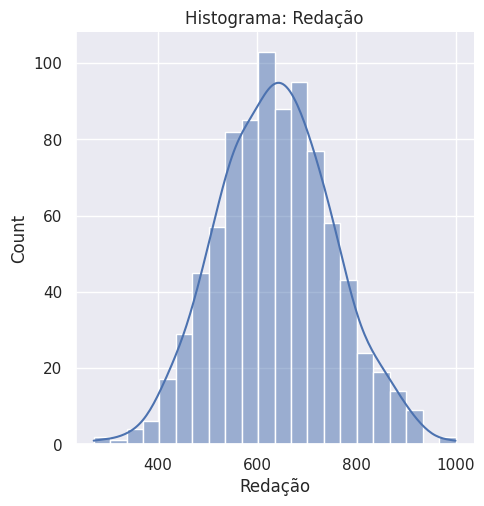

<Figure size 800x1000 with 0 Axes>

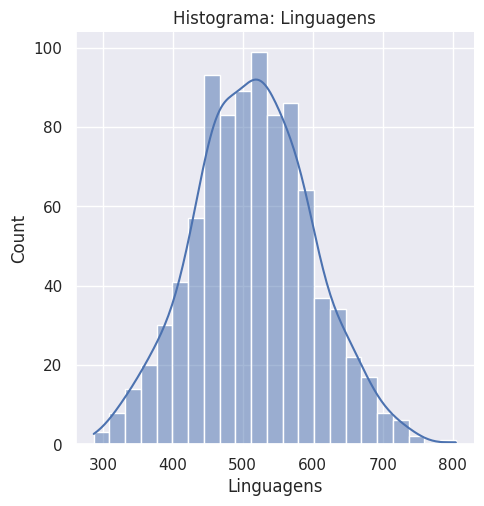

In [ ]:
plt.rcParams['figure.figsize'] = [8,10]
sns.set_theme()

# Criando displots

for column in df_histograma.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.displot(data = df_histograma , x = column, kde= True)
  plt.title("Histograma: "+column)

Podemos perceber que ambos os histogramas estão **quase** centralizados, porém, não podemos os chamar de simétricos, visto que há mais de um pico, chamando nossa atenção para o número de ocorrências (incluindo a nota "0"), e também, estão mais propensos para o lado direito do gráfico.

Por isso, podemos chamar ambos histogramas de **Multimodal.**

**7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria?**

[plt.hist(dado, bins=_, range=[0, 1000])

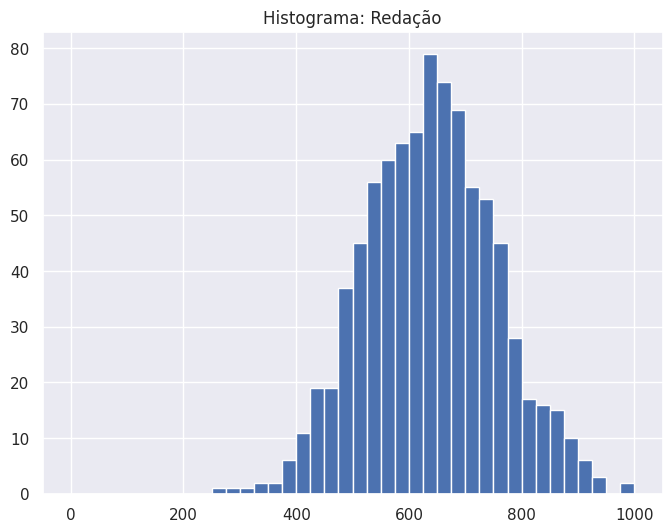

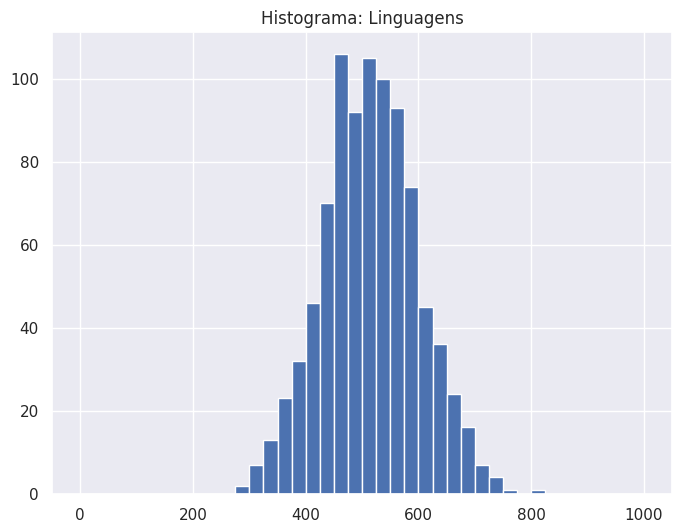

In [ ]:
plt.rcParams['figure.figsize'] = [8,6]
sns.set_theme()

# Criando displots

for column in df_histograma.select_dtypes(include=np.number).columns:
  plt.figure()
  #sns.displot(data = df_histograma , x = column, kde= True)
  plt.hist(df_histograma[column], bins=40, range=[0, 1000])
  plt.title("Histograma: "+column)
  plt.show()


Para o histograma Redação sim, continua a mesma opinião anterior. Já para o histograma de Linguagens, acredito que agora esteja assimétrico, mesmo o maior pico não estando centralizado, mas os ao lado sim, estão.

**Essa questão, junto com a anterior, me geraram uma dúvida, pois as notas 0 me deixaram em duvida em relação a minha resposta.**

**8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.**

In [ ]:
df_boxplot = df[['Ciências da natureza', 'Redação']]
df_boxplot

,Ciências da natureza,Redação
0,390.48,546.37
1,NaN,741.83
2,443.18,684.52
3,413.98,671.24
4,609.76,744.38
...,...,...
995,511.35,NaN
996,542.03,715.98
997,508.03,798.41
998,414.17,593.39


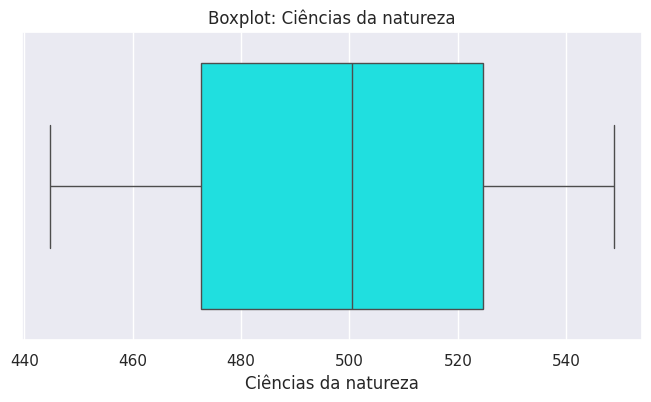

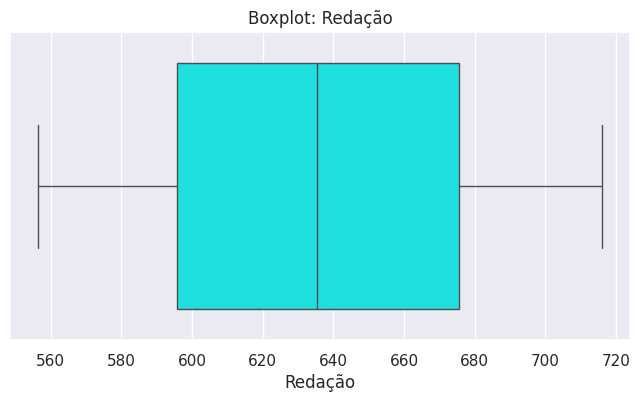

In [ ]:
# Calculando os quartis
df_quartis = df_boxplot.quantile([0.25, 0.50, 0.75])
iqr = df_quartis.loc[0.75] - df_quartis.loc[0.25]

# Calculando IQR para cada disciplina
iqr_inferior = df_quartis.loc[0.25] - 1.5 * iqr
iqr_superior = df_quartis.loc[0.75] + 1.5 * iqr


# Definindo o intervalo no eixo x
x_eixo = (0, 1000)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

## Para cada uma das colunas numéricas roda o boxplot

for column in df_quartis.select_dtypes(include=np.number).columns:
	plt.figure()
	sns.boxplot(data=df_quartis, x = column, color='cyan',showfliers=True)
	plt.title("Boxplot: "+column)
	#plt.xlim(x_eixo)

plt.show()


**9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere ignificativamente um  valor acima de 5%**

In [ ]:
# Removendo outliers
df_sem_outliers = df_quartis[(df_quartis >= iqr_inferior) & (df_quartis <= iqr_superior)]

# Verificando se a remoção dos outliers altera significativamente a média nacional
# Calculando a média antes e depois da remoção dos outliers
media_nacional_antes = df.mean()
media_nacional_depois = df_sem_outliers.mean()

# Calculando a diferença percentual entre as médias
diferenca_percentual = ((media_nacional_depois - media_nacional_antes) / media_nacional_antes) * 100

# Verificando se a diferença percentual é maior que 5%
if any(abs(diferenca_percentual) > 5):
    print("Sim, a remoção dos outliers altera significativamente a média nacional.")
else:
    print("Não, a remoção dos outliers não altera significativamente a média nacional.")


A remoção dos outliers não altera significativamente a média nacional.


<ipython-input-40-4fb3de2a5a7b>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_nacional_antes = df.mean()


Eu fiquei com dúvida nessa questão, apliquei a remoção de outliers mesmo não tendo aparecido visualmente para mim, que eu saiba (até o momento,com meus conhecimentos limitados), apesar de achar a resposta que me retornou inadequada.

**10.  Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.**

In [ ]:
df_sem_genero = df.drop(columns=['Sexo'])
df_sem_genero


In [ ]:
media_original = df.mean()
media_original


In [ ]:
desvio_padrao_original = df.std()
desvio_padrao_original

In [ ]:
# Substituição dos valores nulos usando  média
dados_media = dados_media.fillna(media_original.mean())


# Calcular a média dos dados substituídos
media_da_media = dados_media.mean()
media_da_media

<ipython-input-85-9bf6a456ee22>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_da_media = dados_media.mean()


Linguagens             514.52
Ciências humanas       527.04
Ciências da natureza   499.32
Matemática             535.97
Redação                637.78
dtype: float64

In [ ]:
# Substituição do valores nulos usando moda
dados_moda = dados_moda.fillna(media_original.mean())

# Calcular a média dos dados substituidos
media_da_moda = dados_moda.mean()
media_da_moda

<ipython-input-84-fee429d61f57>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_da_moda = dados_moda.mean()


Linguagens             491.09
Ciências humanas       511.87
Ciências da natureza   466.77
Matemática             519.54
Redação                586.41
dtype: float64

In [ ]:
# Substituição do valores nulos usando mediana
dados_mediana = dados_mediana.fillna(media_original.mean())

# Calcular a média dos dados substituidos
media_da_mediana = dados_mediana.mean()
media_da_mediana

<ipython-input-86-6fac43071eac>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_da_mediana = dados_mediana.mean()


Linguagens             514.58
Ciências humanas       526.88
Ciências da natureza   499.52
Matemática             535.76
Redação                637.43
dtype: float64